# CS506 UBI project

## Q3: How many (& what percentage of) people or families are living under the poverty lines with respect to each family size?

Author: Tsung-Han Yu

The data containing relevant information is S1702. I used the data Alex already cleaned and saved as ['S1702_cleaned.csv'](https://drive.google.com/file/d/1uUbhCdY_LtLJv8f9uOw139y4BEuT0TwZ/view?usp=share_link). Since the data only specify families instead of people, I'll be using the family size as the unit of analysis.

In [1]:
import pandas as pd

df = pd.read_csv('../Data/S1702_cleaned.csv', dtype={'Census Tract': str})

In [2]:
df.columns

Index(['Census Tract', 'Family Status', 'Data', 'Value', 'Families',
       'With related children of householder under 18 years',
       'With related children of householder under 5 years',
       'With related children of householder under 5 years and 5 to 17 years',
       'With related children of householder 5 to 17  years',
       'RACE AND HISPANIC OR LATINO ORIGIN',
       'Families with a householder who is--', 'White alone',
       'Black or African American alone',
       'American Indian and Alaska Native alone', 'Asian alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some other race alone', 'Two or more races',
       'Hispanic or Latino origin (of any race)',
       'White alone, not Hispanic or Latino', 'Householder worked',
       'Householder worked full-time, year-round in the past 12 months',
       'Householder 65 years and over', 'Family received --',
       'Supplemental Security Income (SSI) and/or cash public assistance income in the p

In [3]:
boston_census_tracts = set(['1.01', '1.02', '1001', '1002', '1003', '1004', '1005', '1006.01', '1006.03', '1007', '1008', '1009', '101.03', '101.04', '1010.01', '1010.02', '1011.01', '1011.02', '102.04', '102.05', '102.06', '103', '104.03', '104.04', '104.05', '104.08', '105', '106', '107.01', '107.02', '108.01', '108.02', '1101.04', '1101.05', '1101.06', '1102.01', '1103.01', '1104.01', '1104.03', '1105.01', '1105.02', '1106.01', '1106.07', '1201.03', '1201.04', '1201.05', '1202.01', '1203.01', '1204', '1205', '1206', '1207', '1301.01', '1302', '1303', '1304.02', '1304.04', '1304.06', '1401.02', '1401.05', '1401.06', '1401.07', '1402.01', '1402.02', '1403', '1404', '2.01', '2.02', '201.01', '202', '203.01', '203.02', '203.04', '203.05', '3.01', '3.02', '301', '302', '303.01', '303.02', '304', '305', '4.01', '4.02', '401', '402', '403', '404.01', '406', '408.01', '5.02', '5.03', '5.05', '5.06', '501.01', '502', '503', '504', '505', '506', '507', '509.01', '510', '511.01', '512', '6.01', '6.03', '6.04', '601.01', '602', '603.01', '604', '605.01', '606.01', '606.02', '606.03', '606.04', '607', '608', '610', '611.01', '612.01', '612.02', '612.03', '612.04', '7.01', '7.03', '7.04', '701.02', '701.03', '701.04', '702.01', '702.02', '703.01', '703.02', '704.02', '705.01', '705.02', '706', '707', '708.01', '708.02', '709.01', '709.02', '711.01', '712.01', '8.04', '8.05', '8.06', '8.07', '801', '803', '804.01', '805', '806.01', '808.01', '809', '810.01', '811.01', '811.02', '812', '813.01', '813.02', '814', '815', '817', '818', '819', '820', '821', '901', '902', '903', '904', '906', '907', '909.01', '910.01', '911', '912', '913', '914', '915', '916', '917', '918', '919', '920', '921.01', '922', '923', '924', '9801.01', '9803', '9807', '9809', '9810', '9811', '9812.01', '9812.02', '9813', '9815.01', '9815.02', '9816', '9817', '9818', '9819'])
assert df['Census Tract'][0] in boston_census_tracts
len(boston_census_tracts)

207

## Extract relevant columns

In [4]:
df['Value'].unique()

array(['Estimate', 'Margin of Error'], dtype=object)

In [5]:
df

,Census Tract,Family Status,Data,Value,Families,With related children of householder under 18 years,With related children of householder under 5 years,With related children of householder under 5 years and 5 to 17 years,With related children of householder 5 to 17 years,RACE AND HISPANIC OR LATINO ORIGIN,...,Renter Occupied,ALL FAMILIES WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS,50 percent of poverty level,125 percent of poverty level,150 percent of poverty level,185 percent of poverty level,200 percent of poverty level,300 percent of poverty level,400 percent of poverty level,500 percent of poverty level
0,1.01,All families,Total,Estimate,191,96.0,0.0,0.0,96.0,NaN,...,62.0,NaN,0.0,6.0,6.0,6.0,12.0,12.0,24.0,65.0
1,1.01,All families,Total,Margin of Error,61,61.0,13.0,13.0,61.0,NaN,...,56.0,NaN,13.0,11.0,11.0,11.0,14.0,14.0,23.0,38.0
2,1.01,All families,Percent below poverty level,Estimate,0.0,0.0,NaN,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.01,All families,Percent below poverty level,Margin of Error,18.8,32.7,NaN,NaN,32.7,NaN,...,41.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.01,Married-couple families,Total,Estimate,166,96.0,0.0,0.0,96.0,NaN,...,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,9901.01,Married-couple families,Percent below poverty level,Margin of Error,**,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2816,9901.01,Female householder no spouse present,Total,Estimate,0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2817,9901.01,Female householder no spouse present,Total,Margin of Error,13,13.0,13.0,13.0,13.0,NaN,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2818,9901.01,Female householder no spouse present,Percent below poverty level,Estimate,-,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
family_size = ['2 people',
                '3 or 4 people',
                '5 or 6 people',
                '7 or more people']
all_families_mask = df['Family Status'] == 'All families'
total_data_mask = df['Data'] == 'Total'
pct_below_poverty_mask = df['Data'] == 'Percent below poverty level'
value_est_mask = df['Value'] == 'Estimate'
value_moe_mask = df['Value'] == 'Margin of Error'
census_tract_mask = df['Census Tract'].isin(boston_census_tracts)

total_family_est = df[all_families_mask & total_data_mask & value_est_mask & census_tract_mask][family_size]
total_family_moe = df[all_families_mask & total_data_mask & value_moe_mask & census_tract_mask][family_size]
pct_below_poverty_est = df[all_families_mask & pct_below_poverty_mask & value_est_mask & census_tract_mask][family_size]
pct_below_poverty_moe = df[all_families_mask & pct_below_poverty_mask & value_moe_mask & census_tract_mask][family_size]

assert set(boston_census_tracts) - set(df['Census Tract'].unique()) == set()  # All Boston census tracts are in the dataset

These are the number of missing values in 'Percent below poverty level' column. '7 or more people' has a lot more missing values than others.

In [7]:
pct_below_poverty_est.isna().sum(), pct_below_poverty_moe.isna().sum()

(2 people             16
 3 or 4 people        20
 5 or 6 people        58
 7 or more people    145
 dtype: int64,
 2 people             16
 3 or 4 people        20
 5 or 6 people        58
 7 or more people    145
 dtype: int64)

I'll fill the missing values with zeros.

In [9]:
pct_below_poverty_est.fillna(0, inplace=True)
pct_below_poverty_moe.fillna(0, inplace=True)
pct_below_poverty_est.isna().sum(), pct_below_poverty_moe.isna().sum()

(2 people            0
 3 or 4 people       0
 5 or 6 people       0
 7 or more people    0
 dtype: int64,
 2 people            0
 3 or 4 people       0
 5 or 6 people       0
 7 or more people    0
 dtype: int64)

Calculate the total number of families living below poverty level by performing element-wise multiplication of the two dataframes.

In [10]:
num_families_below_poverty = (pct_below_poverty_est.values / 100) * total_family_est
num_families_below_poverty

,2 people,3 or 4 people,5 or 6 people,7 or more people
0,0.000,0.000,0.000,0.000
12,12.054,71.064,0.000,0.000
24,7.080,0.000,0.000,71.988
36,42.926,88.168,5.985,12.000
48,18.023,0.000,0.000,0.000
...,...,...,...,...
2748,0.000,0.000,0.000,0.000
2760,0.000,0.000,0.000,0.000
2772,0.000,0.000,0.000,0.000
2784,0.000,0.000,0.000,0.000


## 3.1 How many families are living under the poverty lines with respect to each family size?

In [11]:
num_families_below_poverty.sum()

2 people            6906.679
3 or 4 people       6806.412
5 or 6 people       2065.257
7 or more people     244.902
dtype: float64

### Observation

The majority of families living under the poverty level have 2-4 people in their family, which comprises 85% of the total number of families living under the poverty level.

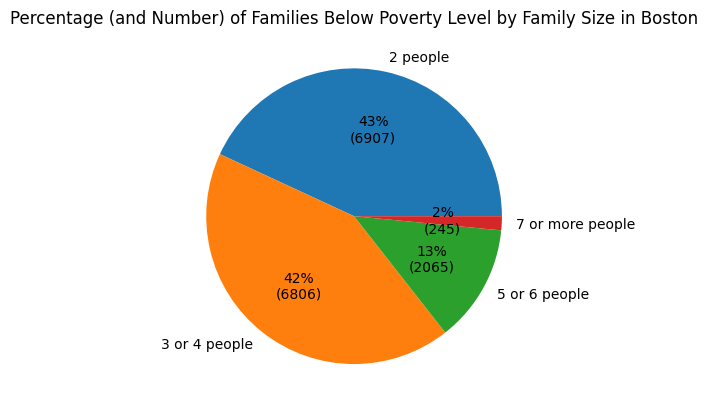

In [12]:
import matplotlib.pyplot as plt

series = num_families_below_poverty.sum()

def format_func(value):
    return f'{value:.0f}%\n({round(value / 100 * sum(series))})'

# series.plot(kind='pie', autopct='%1.1f%%')
series.plot(kind='pie', autopct=format_func)
plt.title('Percentage (and Number) of Families Below Poverty Level by Family Size in Boston')
plt.ylabel('')

plt.show()

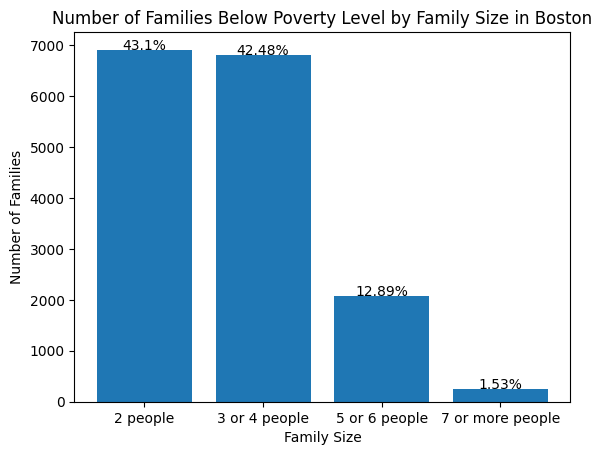

In [13]:
fig, ax = plt.subplots()

# Create the bar chart
ax.bar(series.index, series.values)

# Calculate the percentages and add them to the top of each bar
for i, v in enumerate(series.index):
    ax.text(v, series.values[i]+5, str(round(series.values[i]/series.sum()*100, 2))+"%", ha='center')

# Add labels and title
ax.set_xlabel('Family Size')
ax.set_ylabel('Number of Families')
ax.set_title('Number of Families Below Poverty Level by Family Size in Boston')

# Show the plot
plt.show()

## 3.2 What percentage of families are living under the poverty lines with respect to each family size?

In [14]:
pct_families_below_poverty = (num_families_below_poverty.sum() / total_family_est.sum().values) * 100
pct_families_below_poverty

2 people            11.126704
3 or 4 people       13.085982
5 or 6 people       16.977041
7 or more people    12.916772
dtype: float64

### Observation

There's an increasing trend of percentage of families with respect to family size and family with more than 7 people especially are more likely to live below poverty level, but note that the number of families with 7 or more people is a lot smaller.

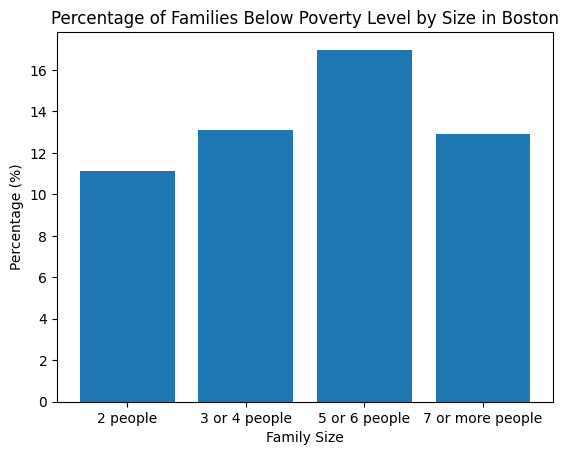

In [15]:
import matplotlib.pyplot as plt

series_pct = pct_families_below_poverty
series_abs = num_families_below_poverty.sum().round(0).astype(int)
fig, ax = plt.subplots()
plt.bar(series_pct.index, series_pct.values)
plt.xlabel('Family Size')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Families Below Poverty Level by Size in Boston')
plt.show()

### Visualization of "All Families vs Families Below Poverty Level by Family Size"

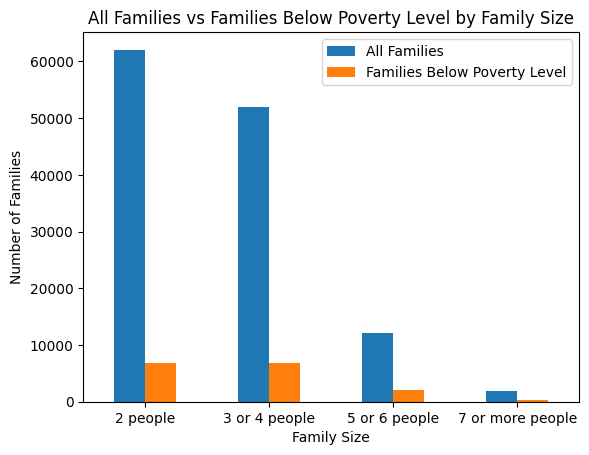

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'All Families': total_family_est.sum().astype(int).values,
    'Families Below Poverty Level': series_abs.values,
}, index=series_pct.index)

fig, ax = plt.subplots()
data.plot(kind='bar', ax=ax)

ax.legend(loc='upper right')
ax.set_xlabel('Family Size')
ax.set_ylabel('Number of Families')
ax.set_title('')

plt.title('All Families vs Families Below Poverty Level by Family Size')
plt.xticks(rotation=0)
plt.show()

## Map visualization

In [17]:
total_family_est_2 = df[all_families_mask & total_data_mask & value_est_mask & census_tract_mask]
pct_below_poverty_est_2 = df[all_families_mask & pct_below_poverty_mask & value_est_mask & census_tract_mask]

In [18]:
df[all_families_mask & total_data_mask & census_tract_mask]

,Census Tract,Family Status,Data,Value,Families,With related children of householder under 18 years,With related children of householder under 5 years,With related children of householder under 5 years and 5 to 17 years,With related children of householder 5 to 17 years,RACE AND HISPANIC OR LATINO ORIGIN,...,Renter Occupied,ALL FAMILIES WITH INCOME BELOW THE FOLLOWING POVERTY RATIOS,50 percent of poverty level,125 percent of poverty level,150 percent of poverty level,185 percent of poverty level,200 percent of poverty level,300 percent of poverty level,400 percent of poverty level,500 percent of poverty level
0,1.01,All families,Total,Estimate,191,96.0,0.0,0.0,96.0,NaN,...,62.0,NaN,0.0,6.0,6.0,6.0,12.0,12.0,24.0,65.0
1,1.01,All families,Total,Margin of Error,61,61.0,13.0,13.0,61.0,NaN,...,56.0,NaN,13.0,11.0,11.0,11.0,14.0,14.0,23.0,38.0
12,1.02,All families,Total,Estimate,611,213.0,9.0,35.0,169.0,NaN,...,461.0,NaN,23.0,105.0,105.0,132.0,132.0,232.0,247.0,329.0
13,1.02,All families,Total,Margin of Error,130,45.0,20.0,41.0,35.0,NaN,...,131.0,NaN,27.0,58.0,58.0,71.0,71.0,103.0,104.0,102.0
24,2.01,All families,Total,Estimate,682,331.0,123.0,103.0,105.0,NaN,...,499.0,NaN,72.0,79.0,118.0,182.0,244.0,273.0,296.0,359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,9817,All families,Total,Margin of Error,13,13.0,13.0,13.0,13.0,NaN,...,13.0,NaN,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0
2784,9818,All families,Total,Estimate,17,12.0,12.0,0.0,0.0,NaN,...,12.0,NaN,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0
2785,9818,All families,Total,Margin of Error,19,18.0,18.0,13.0,13.0,NaN,...,18.0,NaN,13.0,13.0,13.0,13.0,13.0,18.0,18.0,18.0
2796,9819,All families,Total,Estimate,0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
families_by_census_tract = total_family_est_2.groupby('Census Tract')['Families'].sum()
pct_below_poverty_by_census_tract = pct_below_poverty_est_2.groupby('Census Tract')['Families'].sum()

# clean data and change data types
families_by_census_tract = families_by_census_tract.astype('int')
pct_below_poverty_by_census_tract = pct_below_poverty_by_census_tract.replace('-', 100).astype('float')

families_below_poverty_by_census_tract = families_by_census_tract * pct_below_poverty_by_census_tract / 100
families_below_poverty_by_census_tract = families_below_poverty_by_census_tract.reset_index()
families_below_poverty_by_census_tract

,Census Tract,Families
0,1.01,0.000
1,1.02,83.096
2,1001,298.298
3,1002,252.252
4,1003,213.807
...,...,...
202,9815.02,0.000
203,9816,0.000
204,9817,0.000
205,9818,0.000


In [20]:
# read geojson file and 
import json 

with open('boston_census_tracts.json', 'r') as jsonFile:
    boston_geojson = json.load(jsonFile)

In [21]:
families_below_poverty_by_census_tract['Census Tract']

0         1.01
1         1.02
2         1001
3         1002
4         1003
        ...   
202    9815.02
203       9816
204       9817
205       9818
206       9819
Name: Census Tract, Length: 207, dtype: object

In [22]:
# show the number of family below poverty level by census tract in a heap map
import folium
boston_map = folium.Map(location=[42.3344474, -71.0826841], zoom_start=12) # type: ignore

folium.Choropleth(
    geo_data=boston_geojson,
    name='choropleth',
    data=families_below_poverty_by_census_tract,
    columns=['Census Tract', 'Families'],
    key_on='feature.properties.NAME',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.1, # type: ignore
    legend_name='Number of families below poverty level',
).add_to(boston_map)

folium.LayerControl().add_to(boston_map)
# boston_map.save('map.html')
boston_map

In [23]:
# show the percentage of family below poverty level by census tract in a heap map
import folium
boston_map = folium.Map(location=[42.3344474, -71.0826841], zoom_start=12) # type: ignore

folium.Choropleth(
    geo_data=boston_geojson,
    name='choropleth',
    data=pct_below_poverty_by_census_tract,
    columns=['Census Tract', 'Families'],
    key_on='feature.properties.NAME',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.1, # type: ignore
    legend_name='Number of families below poverty level',
).add_to(boston_map)

folium.LayerControl().add_to(boston_map)
# boston_map.save('map.html')
boston_map